## 영상정보처리 13주차 과제 템플리트
- 마감: 11월 29일 11시 59분 PM
- 점수: 10점 만점
    
이름: 이상민            
학번: 32153180

입력 이미지: 자유



# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/MyDrive/ImageProcClass/Week13
%ls

/gdrive/MyDrive/ImageProcClass/Week13
2020-2-ImgProc-HW13-이상민-32153180.ipynb


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '../Dongkeun-OpenCV-ImgData/opencv.jpg'

def show_with_matplotlib_gray(img, title):
  plt.title(title)
  plt.axis('off')
  plt.imshow(img, cmap='gray')

##문제 1
수업 시간에 배운 다음의 방법들을 함수화 하고, 자유롭게 선택된 이미지를 이용하여 테스트 하시오.



1.   HoughLinesP 를 이용한 직선 성분 찾기
2.   contour 관련 함수들
  - 하나의 세그먼트에 대한 외곽선 그리기
  - 하나의 이미지에 있는 모든 세그먼트에 대한 외곽선 그리기 
  - 하나의 세그먼트에 대한 외곽선 그리기 영역 계산하기 
  - 하나의 컨투어에 대한 centroid 찾기
  - 하나의 컨투어에 대한 bounding rectangle 찾기
  - 하나의 컨투어에 대한 rotated rectangle 찾기
  - 하나의 컨투어에 대한 convex hull 찾기
  - 하나의 컨투어에 대한 convexity defects 찾기
  









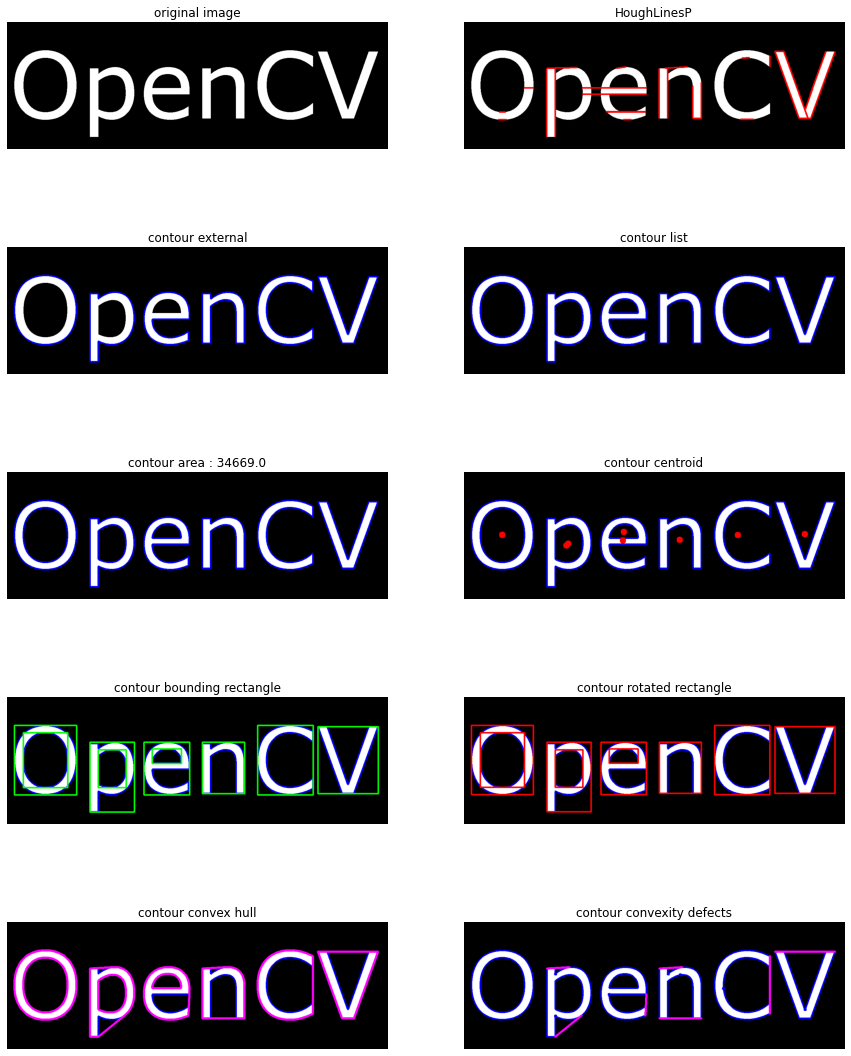

In [21]:
img = cv2.imread(img_path)

def find_line_by_hough():
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  edge = cv2.Canny(gray, 50, 200)
  lines = cv2.HoughLinesP(edge, rho=1, theta=np.pi/180, threshold=50, minLineLength=10, maxLineGap=50)

  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 4)
  show_with_matplotlib_gray(img, 'HoughLinesP')

def draw_contour(mode, method, flag):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  contours, hierarchy = cv2.findContours(gray, mode, method)
  cv2.drawContours(img, contours, -1, (0, 0, 255), 4)

  area = 0
  if flag == 1:
    for cnt in contours:
      area = cv2.contourArea(cnt)
  elif flag == 2:
    for cnt in contours:
      M = cv2.moments(cnt)
      if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
      else:
        cx, cy = 0, 0
      cv2.circle(img, (cx, cy), 10, (255, 0, 0), -1)
  elif flag == 3:
    for cnt in contours:
      x, y, w, h = cv2.boundingRect(cnt)
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
  elif flag == 4:
    for cnt in contours:
      rect = cv2.minAreaRect(cnt)
      box = cv2.boxPoints(rect)
      box = np.int0(box)
      cv2.drawContours(img, [box], 0, (255, 0, 0), 4)
  elif flag == 5:
    for cnt in contours:
      hull = cv2.convexHull(cnt)
      cv2.drawContours(img, [hull], 0, (255, 0, 255), 5)
  elif flag == 6:
    icnt = 0
    for cnt in contours:
      hull = cv2.convexHull(cnt, returnPoints=False)
      defects = cv2.convexityDefects(cnt, hull)

      icnt += 1
      for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start, end = tuple(cnt[s][0]), tuple(cnt[e][0])
        far = tuple(cnt[f][0])

        if d > 500:
          cv2.line(img, start, end, [255, 0, 255], 5)
          cv2.circle(img, far, 5, [0, 0, 255], -1)
    
  return img, area  

plt.figure(figsize=(15, 20))
plt.subplot(521)
show_with_matplotlib_gray(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 'original image')
plt.subplot(522)
find_line_by_hough()
plt.subplot(523)
show_with_matplotlib_gray(draw_contour(cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE, 0)[0], 'contour external')
plt.subplot(524)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 0)[0], 'contour list')
plt.subplot(525)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 1)[0], 'contour area : {}'.\
                          format(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 1)[1]))
plt.subplot(526)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 2)[0], 'contour centroid')
plt.subplot(527)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 3)[0], 'contour bounding rectangle')
plt.subplot(528)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 4)[0], 'contour rotated rectangle')
plt.subplot(529)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 5)[0], 'contour convex hull')
plt.subplot(5, 2, 10)
show_with_matplotlib_gray(draw_contour(cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE, 6)[0], 'contour convexity defects')
plt.show()